# Imports

In [78]:
import importlib
import functions as f  # Our defined functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import numpy as np
from tqdm.notebook import tqdm
import os
import math
import time

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

importlib.reload(f)

GRatio = (1 + 5 ** .5) / 2

WIDTH = .5
DASH = (10, 10)


# Solving models

{'Rt(S,I_A)': 1.9979962577265342, 'Rt(S,I_B)': 0.0}


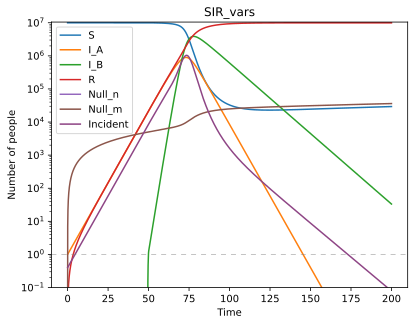

In [87]:
importlib.reload(f)


t_final = {
    'SIRS_vars': 150,
    'SIRS_deaths': 120,
    'SIR_test3': 150,
    'SIS_deaths_2': 150,
    'SIS': 100,
    'SIR_betajump': 125,
    'SIR': 125,
    'SIR2': 125,
    'SIR3': 200,
    'SIR_vars': 200
}


for modelName in ['SIR_vars']:

    model = f.loadModel(modelName, printText=False)
    solution, t_span = f.solve(model, (0, t_final[modelName]), 100)

    fig = plt.figure()
    f.plotCurves(t_span,
                 np.transpose(solution),
                  toPlot=list(range(solution.shape[1])),
                 labels=f.getCompartments(model),
                 title=modelName,
                 scales=['linear', 'linear'])

    plt.plot(t_span, f.infCurve(model, solution, t_span),
             label='Incident', c='#8E4585')

    plt.ylim(bottom=.1)
    plt.legend(loc='best')
    plt.axhline(y=1, linestyle='--', color='grey',
                linewidth=WIDTH, dashes=DASH)
    plt.yscale('log')

    f.mod(model, printText=False)

    model, modelMod, _, r0 = f.computeR0(
        modelName, (0, 300), printInit=False, printWarnings=False,
        scaledInfs=False, printText=False)

    print(r0)

    plt.show()


# $\mathcal{R}_t$ curves

In [88]:
parameters = {
    'SIR_deaths': {
        't_span_rt': (0, 80),
        'R0': 4,
        'legendLoc': 'center left'
    },
    'SIR_vars': {
        't_span_rt': (40, 90),
        'R0': 10,
        'legendLoc': 'center left'
    },
    'SIR_test2': {
        't_span_rt': (0, 175),
        'R0': 4,
        'legendLoc': 'center left'
    },
    'SIRS_vacc_morts': {
        't_span_rt': (0, 200),
        'R0': 32 / 15,
        'legendLoc': 'center left'
    },
    'SI': {
        't_span_rt': (0, 60),
        'R0': 0,
        'legendLoc': 'best'
    },
    'SIR': {
        't_span_rt': (0, 60),
        'R0': 4,
        'legendLoc': 'upper right'
    },
    'SIR copy': {
        't_span_rt': (0, 50),
        'R0': 2,
        'legendLoc': 'upper right'
    },
    'SIR2': {
        't_span_rt': (0, 50),
        'R0': 4,
        'legendLoc': 'center left'
    },
    'SIR_betajump': {
        't_span_rt': (0, 60),
        'R0': np.array([4 if t <= 2000 else 2 for t in range(6001)]),
        'legendLoc': 'center left'
    },
    'SIR3': {
        't_span_rt': (0, 200),
        'R0': 3,
        'legendLoc': 'center left'
    }
}

  0%|          | 0/51 [00:00<?, ?it/s]

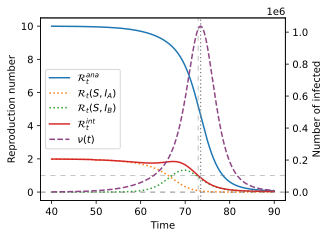

In [93]:
importlib.reload(f)

for name in ['SIR_vars']:
    rtCurves = \
        f.compare(name, **parameters[name], sub_rt=1,
                  plotANA=True,
                  plotInfected=True,
                  title='',
                  useLog=False,
                  printText=False,
                  forceColors=False)
    plt.show()


  0%|          | 0/61 [00:00<?, ?it/s]

Time  Node         Value     Divide    Rt
   0, Rt(S,I),       3.2,       0.8, 3.98
   1, Rt(S,I),       5.8,       1.5, 3.97
   2, Rt(S,I),      10.5,       2.7, 3.97
   3, Rt(S,I),      19.2,       4.8, 3.96
   4, Rt(S,I),      34.8,       8.8, 3.95
   5, Rt(S,I),      63.3,      16.1, 3.94
   6, Rt(S,I),     114.8,      29.3, 3.92
   7, Rt(S,I),     208.3,      53.3, 3.91
   8, Rt(S,I),     377.6,      97.2, 3.88
   9, Rt(S,I),     683.5,     177.1, 3.86
  10, Rt(S,I),    1235.3,     322.7, 3.83
  11, Rt(S,I),    2228.2,     587.9, 3.79
  12, Rt(S,I),    4009.5,    1071.1, 3.74
  13, Rt(S,I),    7192.9,    1951.0, 3.69
  14, Rt(S,I),   12853.1,    3552.7, 3.62
  15, Rt(S,I),   22850.7,    6466.2, 3.53
  16, Rt(S,I),   40352.4,   11757.8, 3.43
  17, Rt(S,I),   70616.8,   21343.6, 3.31
  18, Rt(S,I),  122048.0,   38625.5, 3.16
  19, Rt(S,I),  207254.9,   69513.2, 2.98
  20, Rt(S,I),  112088.3,   61929.0, 1.81
  21, Rt(S,I),  132302.3,   74383.5, 1.78
  22, Rt(S,I),  155099.8,   88947.

  0%|          | 0/61 [00:00<?, ?it/s]

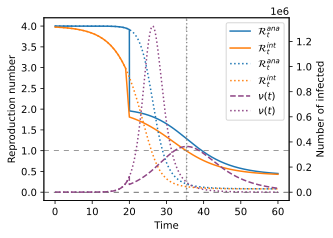

In [75]:
importlib.reload(f)

fig, ax1 = plt.subplots(figsize=(4*1.1, 3*1.1))
ax2 = ax1.twinx()

rtCurves = \
    f.compare('SIR_betajump', **parameters['SIR_betajump'], sub_rt=1,
              plotANA=True, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              forceColors=True,
              saveGraph=False,
              printR0=True)
rtCurves = \
    f.compare('SIR', **parameters['SIR'], sub_rt=1,
              plotANA=True, plotANA_v2=False,
              susceptibles=[0],
              plotBound=False,
              plotInfected=True,
              title='',
              useLog=False,
              printText=False,
              whereToPlot=(fig, ax1, ax2),
              plotStyle=':',
              forceColors=True,
              drawVertical=False)
plt.show()


In [76]:
importlib.reload(f)

for name in  \
    ['SIS_deaths', 'SIS_vacc',
     'SIRS_deaths', 'SIS_deaths_2',
     'SIR_vars', 'SIR_test2',
     'SIR_deaths', 'SIR_test', 'SIR',
     'SIR_test3', 'SIRS_vars', 'SIRS_vacc_morts']:

    measures = {
        'layerDistance': 1,
        'nodeDistance': 2,
        'varDistance': .25,
        'nullDistance': .8,
        'baseAngle': 10,
        'contactPositions': ("2/5", "3/5"),
        'scale': .6
    }

    # f.printModel(f.loadModel(name, True, False))

    f.createLaTeX(f.loadModel(name, True, False), **measures)

    f.createLaTeX(f.mod(f.loadModel(name, True, False),
                        overWrite=True), **measures)


Tikz created for SIS_deaths
Tikz created for SIS_deaths_mod
Tikz created for SIS_vacc
Tikz created for SIS_vacc_mod
Tikz created for SIRS_deaths
Tikz created for SIRS_deaths_mod
Tikz created for SIS_deaths_2
Tikz created for SIS_deaths_2_mod
Tikz created for SIR_vars
Tikz created for SIR_vars_mod
Tikz created for SIR_test2
Tikz created for SIR_test2_mod
Tikz created for SIR_deaths
Tikz created for SIR_deaths_mod
Tikz created for SIR_test
Tikz created for SIR_test_mod
Tikz created for SIR
Tikz created for SIR_mod
Tikz created for SIR_test3
Tikz created for SIR_test3_mod
Tikz created for SIRS_vars
Tikz created for SIRS_vars_mod
Tikz created for SIRS_vacc_morts
Tikz created for SIRS_vacc_morts_mod
